# TEST SVM

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from better_tensorflow import KernelSVM

## Classification



### Linear Simple :
        Polynomial Kernel : OK


Prédictions : [1, -1, -1]
Vraies étiquettes : [1, -1, -1]
Accuracy : 1.0

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



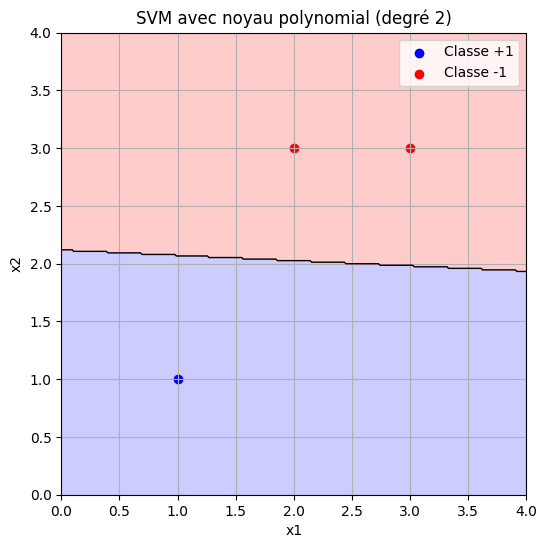

In [77]:
X = np.array([[1, 1], [2, 3], [3, 3]])
Y = np.array([1, -1, -1])

svm = KernelSVM("poly", 1, lr=0.1, lambda_svm=0.01, epochs=200)

# Entraînement
svm.fit(X.tolist(), Y.tolist())

# Prédictions
Y_pred = svm.predict(X.tolist())

# Évaluation
print("Prédictions :", Y_pred)
print("Vraies étiquettes :", Y.tolist())
print("Accuracy :", accuracy_score(Y, Y_pred))
print("\nClassification Report:\n", classification_report(Y, Y_pred))

# Tracé des points
plt.figure(figsize=(6, 6))
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color="blue", label="Classe +1")
plt.scatter(X[Y == -1, 0], X[Y == -1, 1], color="red", label="Classe -1")

x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(svm.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=["red", "blue"])
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=1)

plt.title("SVM avec noyau polynomial")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.show()

### Linear Multiple :
        Polynomial Kernel : OK
        RBF Kernel : OK


Accuracy: 1.00


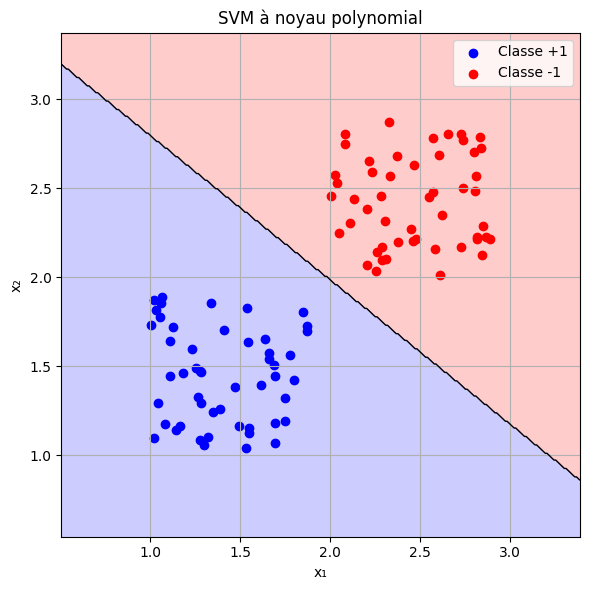

In [79]:
np.random.seed(42)
X = np.concatenate(
    [
        np.random.random((50, 2)) * 0.9 + np.array([1, 1]),  # Classe +1
        np.random.random((50, 2)) * 0.9 + np.array([2, 2]),  # Classe -1
    ]
)
Y = np.concatenate([np.ones(50), -np.ones(50)])

# === Conversion pour Rust ===
X_list = X.tolist()
Y_list = Y.astype(int).tolist()

# === Instanciation et entraînement du modèle SVM non linéaire ===
svm = KernelSVM("poly", 1, lr=0.1, lambda_svm=0.01, epochs=200)
svm.fit(X_list, Y_list)

# === Prédictions
predictions = svm.predict(X_list)
accuracy = np.mean(np.array(predictions) == np.array(Y_list))
print(f"Accuracy: {accuracy:.2f}")

# === Tracé des points
plt.figure(figsize=(6, 6))
plt.scatter(X[:50, 0], X[:50, 1], color="blue", label="Classe +1")
plt.scatter(X[50:, 0], X[50:, 1], color="red", label="Classe -1")

# === Tracé de la frontière de décision (RBF ou poly)
x_min, x_max = np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5
y_min, y_max = np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(svm.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=["red", "blue"])
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=1)

plt.title("SVM à noyau polynomial")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### XOR :
        Polynomial Kernel (degre>=2) : OK
        RBF Kernel : OK


Prédictions : [1, -1, -1, 1]
 Vraies étiquettes : [1, -1, -1, 1]
Accuracy : 1.0

 Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



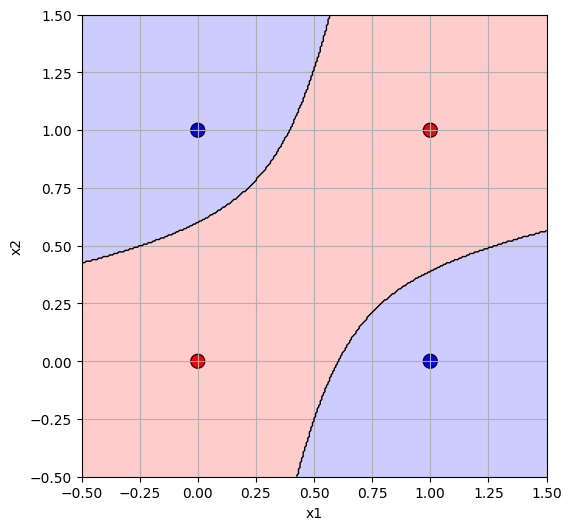

In [87]:
## Classification avec SVM à noyau RBF (XOR)
X = np.array([[0, 1], [0, 0], [1, 1], [1, 0]])
Y = np.array([1, -1, -1, 1])  # Encodage XOR

# model = KernelSVM(kernel_type="rbf", param=2.0, lr=0.1, lambda_svm=0.01, epochs=200)
model = KernelSVM("poly", 2, lr=0.1, lambda_svm=0.01, epochs=200)

model.fit(X.tolist(), Y.tolist())

Y_pred = model.predict(X.tolist())

# === Évaluation
print("Prédictions :", Y_pred)
print(" Vraies étiquettes :", Y.tolist())
print("Accuracy :", accuracy_score(Y, Y_pred))
print("\n Classification Report:\n", classification_report(Y, Y_pred))

# === Tracé 2D
plt.figure(figsize=(6, 6))

# Affichage des points
colors = ["blue" if y == 1 else "red" for y in Y]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="k", s=100)

# Grille de prédiction
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(model.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=["red", "blue"])
plt.contour(xx, yy, Z, levels=[0], colors="black", linewidths=1)

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Linear Simple :
        Polynomial Kernel 4(degre>=): OK
        RBF Kernel : OK


Accuracy: 0.95


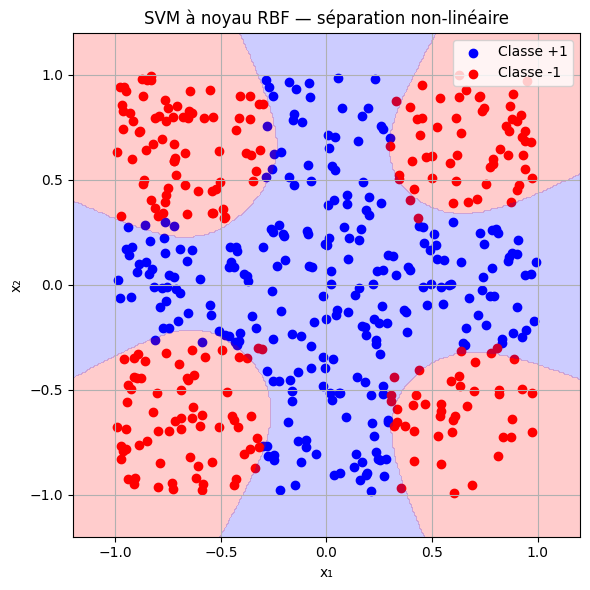

In [96]:
np.random.seed(42)
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.where((np.abs(X[:, 0]) <= 0.3) | (np.abs(X[:, 1]) <= 0.3), 1, -1)

X_list = X.tolist()
Y_list = Y.tolist()

# SVM à noyau RBF
# svm = KernelSVM("rbf", param=5.0, lr=0.01, lambda_svm=0.01, epochs=200)
svm = KernelSVM("poly", 4, lr=0.1, lambda_svm=0.01, epochs=200)

svm.fit(X_list, Y_list)

predictions = svm.predict(X_list)
accuracy = np.mean(np.array(predictions) == np.array(Y_list))
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 6))
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color="blue", label="Classe +1")
plt.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], color="red", label="Classe -1")

# === Tracé des zones de décision
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(svm.predict(grid.tolist())).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=["red", "blue"])

plt.title("SVM à noyau RBF — séparation non-linéaire")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Multi Linear 3 classes :
        Polynomial Kernel : OK
        RBF Kernel : OK


Accuracy (multi-classe): 0.99


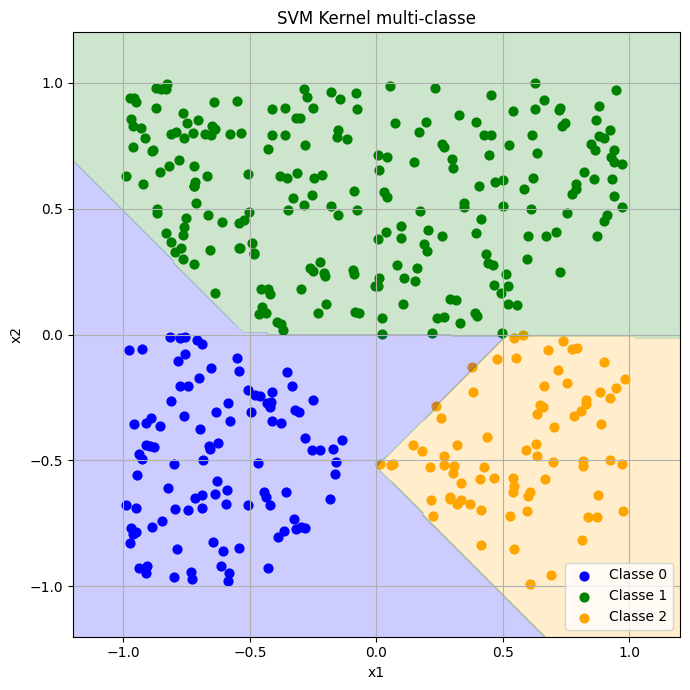

In [100]:
np.random.seed(42)
X = np.random.random((500, 2)) * 2.0 - 1.0

Y_onehot = np.array(
    [
        (
            [1, 0, 0]
            if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0
            else (
                [0, 1, 0]
                if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0
                else (
                    [0, 0, 1]
                    if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0
                    else [0, 0, 0]
                )
            )
        )
        for p in X
    ]
)

mask = ~np.all(Y_onehot == 0, axis=1)
X = X[mask]
Y_onehot = Y_onehot[mask]
Y = np.argmax(Y_onehot, axis=1)  # 0, 1, 2

X_list = X.tolist()
Y_list = Y.tolist()

# === One-vs-all
svms = []
for i in range(3):
    labels = [1 if y == i else -1 for y in Y_list]
    svm = KernelSVM("rbf", param=5.0, lr=0.1, lambda_svm=0.01, epochs=200)
    svm = KernelSVM("poly", 1, lr=0.1, lambda_svm=0.01, epochs=200)
    svm.fit(X_list, labels)
    svms.append(svm)


#  applique les 3 SVM et on choisi celui avec le score le plus elevé
def predict_multiclass(X):
    preds = []
    for x in X:
        scores = [svm.predict([x])[0] for svm in svms]
        preds.append(np.argmax(scores))
    return preds


Y_pred = predict_multiclass(X)
accuracy = np.mean(np.array(Y_pred) == np.array(Y_list))
print(f"Accuracy (multi-classe): {accuracy:.2f}")

plt.figure(figsize=(7, 7))
colors = ["blue", "green", "orange"]
for i in range(3):
    plt.scatter(
        X[Y == i][:, 0], X[Y == i][:, 1], color=colors[i], label=f"Classe {i}", s=40
    )

x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_multiclass(grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, levels=[-0.5, 0.5, 1.5, 2.5], colors=colors)

plt.title("SVM Kernel multi-classe")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Multi Cross :
        Polynomial Kernel : KO
        RBF Kernel : KO


Accuracy: 0.93


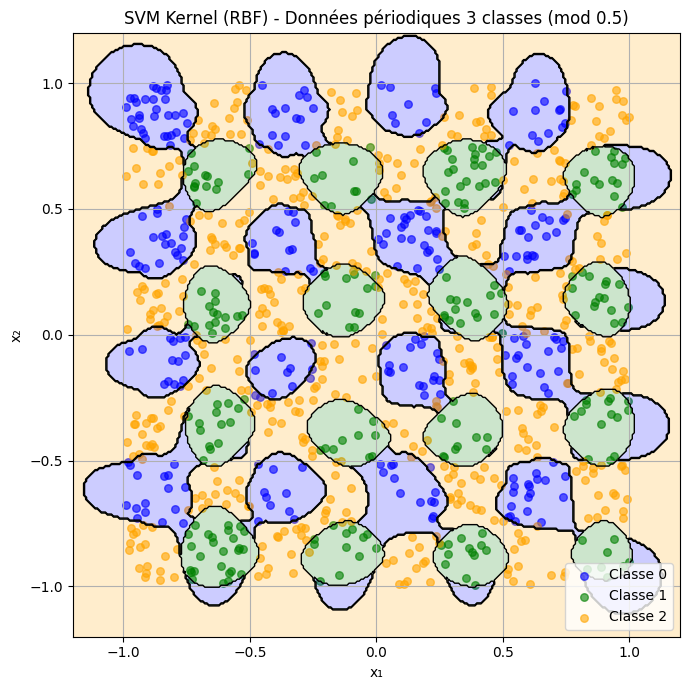

In [104]:
np.random.seed(42)
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y_onehot = np.array(
    [
        (
            [1, 0, 0]
            if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25
            else (
                [0, 1, 0]
                if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25
                else [0, 0, 1]
            )
        )
        for p in X
    ]
)
Y = np.argmax(Y_onehot, axis=1)
X_list = X.tolist()
Y_list = Y.tolist()

# === Entraînement One-vs-All avec 3 modèles KernelSVM (RBF)
svms = []
for i in range(3):
    labels = [1 if y == i else -1 for y in Y_list]
    svm = KernelSVM("rbf", param=10.0, lr=0.1, lambda_svm=0.01, epochs=300)
    # svm = KernelSVM("poly", 4, lr=0.1, lambda_svm=0.01, epochs=200)

    svm.fit(X_list, labels)
    svms.append(svm)


# === Prédiction multi-classe : score maximal
def predict_multiclass(X):
    return [np.argmax([svm.predict([x])[0] for svm in svms]) for x in X]


Y_pred = predict_multiclass(X)
accuracy = np.mean(np.array(Y_pred) == np.array(Y_list))
print(f"Accuracy: {accuracy:.2f}")

# === Tracé des résultats
plt.figure(figsize=(7, 7))
colors = ["blue", "green", "orange"]
for i in range(3):
    plt.scatter(
        X[Y == i][:, 0],
        X[Y == i][:, 1],
        color=colors[i],
        label=f"Classe {i}",
        s=30,
        alpha=0.6,
    )

# === Grille de prédiction pour zones
x_min, x_max = -1.2, 1.2
y_min, y_max = -1.2, 1.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array(predict_multiclass(grid)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, levels=[-0.5, 0.5, 1.5, 2.5], colors=colors)
plt.contour(xx, yy, Z, levels=[0.5, 1.5], colors="black", linewidths=1)

plt.title("SVM Kernel (RBF) - Données périodiques 3 classes (mod 0.5)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()